In [2]:
### Checking the previous applications dataset

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [58]:
# read data
prev_apps = pd.read_csv('previous_application.csv')

#### Check dataframe for basic info

In [59]:
prev_apps.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Check for missing values

In [60]:
prev_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [61]:
prev_apps[prev_apps.isna()].value_counts()

Series([], dtype: int64)

In [62]:
prev_apps.shape

(1670214, 37)

#### There are varying numbers of non-null values in different columns

In [63]:
# Store variables
cols = prev_apps.columns
sz = prev_apps.shape[0]

In [64]:
na_df = pd.DataFrame(columns=['name', 'null count', 'type'])

for col in cols:
    na_sum = prev_apps[col].isna().sum()
    if na_sum != 0:
        na_df = na_df.append({'name': col, 'null count': na_sum, 'type': prev_apps[col].dtype}, ignore_index=True)
        # print(prev_apps[col].isna().sum())



In [65]:
na_df.sort_values(by='null count', ascending=False, inplace=True)

In [66]:
na_df.head()

,name,null count,type
5,RATE_INTEREST_PRIMARY,1664263,float64
6,RATE_INTEREST_PRIVILEGED,1664263,float64
2,AMT_DOWN_PAYMENT,895844,float64
4,RATE_DOWN_PAYMENT,895844,float64
7,NAME_TYPE_SUITE,820405,object


In [67]:
# Getting percentage
na_df['null percent'] = na_df['null count'] / sz * 100

In [68]:
na_df.sort_values(by='null percent', ascending=False, inplace=True)

In [69]:
na_df

,name,null count,type,null percent
5,RATE_INTEREST_PRIMARY,1664263,float64,99.643698
6,RATE_INTEREST_PRIVILEGED,1664263,float64,99.643698
2,AMT_DOWN_PAYMENT,895844,float64,53.63648
4,RATE_DOWN_PAYMENT,895844,float64,53.63648
7,NAME_TYPE_SUITE,820405,object,49.119754
10,DAYS_FIRST_DRAWING,673065,float64,40.298129
11,DAYS_FIRST_DUE,673065,float64,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,673065,float64,40.298129
13,DAYS_LAST_DUE,673065,float64,40.298129
14,DAYS_TERMINATION,673065,float64,40.298129


#### RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED have almost the entire column as NaN. Since the null values are NaN, and they are not changing the type of the columns, and they are not affecting any statistical operations on the columns, it is safe to leave these columns as they are. However, care should be taken to check for these values when performing any operation involving these columns

#### For the other columns, there are varying amounts of null values. However, most of these are supposed to be floating point numbers.
#### There are some exceptions. Looking at those below.

### Checking NFLAG_INSURED_ON_APPROVAL

In [73]:
prev_apps.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [76]:
prev_apps[prev_apps.NFLAG_INSURED_ON_APPROVAL.isna()].NFLAG_INSURED_ON_APPROVAL

4         NaN
6         NaN
7         NaN
8         NaN
9         NaN
           ..
1670197   NaN
1670203   NaN
1670204   NaN
1670205   NaN
1670207   NaN
Name: NFLAG_INSURED_ON_APPROVAL, Length: 673065, dtype: float64

#### In the case of NFLAG_INSURED_ON_APPROVAL, this is supposed to be a flag, and hence, categorical. However, there are cases where we would convert categorical data into numeric data for analysis.
#### So we can leave this column

### Checking PRODUCT_COMBINATION

In [70]:
#Checking 
prev_apps.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [75]:
prev_apps[prev_apps.PRODUCT_COMBINATION.isna()].PRODUCT_COMBINATION

6664       NaN
9029       NaN
17038      NaN
24543      NaN
24574      NaN
          ... 
1657486    NaN
1657679    NaN
1663138    NaN
1663305    NaN
1664860    NaN
Name: PRODUCT_COMBINATION, Length: 346, dtype: object

#### In the case of PRODUCT_COMBINATION, we have NaN combined with strings. Also, the number of null values is only 2% of the total. So it is safe to drop these rows.

In [80]:
prev_apps = prev_apps[~prev_apps.PRODUCT_COMBINATION.isna()]

## Check for outliers

### To check for outliers, we need the numeric columns

##### Find Categorical and Numeric values

In [82]:
prev_apps_numeric = pd.DataFrame()
prev_apps_cat = pd.DataFrame()

# Loop over columns and check the type
for col in cols:
    if (np.issubdtype(prev_apps[col], np.number)):
        prev_apps_numeric[col] = prev_apps[col]
    else:
        prev_apps_cat[col] = prev_apps[col]

In [83]:
prev_apps_numeric.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

##### In prev_apps_numeric, we can loop again to find outlier values

##### Like in finding null values, let's make a table to see the percentage of values outside the IQR range

In [100]:
prev_apps_outliers = pd.DataFrame(columns={'name', 'num outliers', 'outlier percent'})

sz = prev_apps_numeric.shape[0]

ignore = ['SK_ID_PREV', 'SK_ID_CURR', 'NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL']

for col in prev_apps_numeric.columns:
    if col in ignore:
        continue
    descr = prev_apps_numeric[col].describe()

    first = descr['25%']
    third = descr['75%']
    iqr = third - first
    lower = first - (1.5 * iqr)
    upper = third + (1.5 * iqr)

    outliers = prev_apps_numeric[(prev_apps_numeric[col] < lower) | (prev_apps_numeric[col] > upper)]

    num = outliers.shape[0]

    percent = num / sz * 100

    prev_apps_outliers = prev_apps_outliers.append({'name': col, 'num outliers': num, 'outlier percent': percent}, ignore_index=True)

In [101]:
prev_apps_outliers

,num outliers,outlier percent,name
0,82762,4.956200,AMT_ANNUITY
1,208014,12.456913,AMT_APPLICATION
2,180004,10.779535,AMT_CREDIT
3,64402,3.856712,AMT_DOWN_PAYMENT
4,145715,8.726139,AMT_GOODS_PRICE
5,1639,0.098151,HOUR_APPR_PROCESS_START
6,43162,2.584755,RATE_DOWN_PAYMENT
7,234,0.014013,RATE_INTEREST_PRIMARY
8,72,0.004312,RATE_INTEREST_PRIVILEGED
9,17571,1.052239,DAYS_DECISION


In [118]:
prev_apps_numeric_2 = prev_apps_numeric.copy(deep=True)

In [121]:
for col in prev_apps_numeric_2.columns:
    if col in ignore:
        continue
    descr = prev_apps_numeric_2[col].describe()

    first = descr['25%']
    third = descr['75%']
    iqr = third - first
    lower = first - (1.5 * iqr)
    upper = third + (1.5 * iqr)

    max_roof = prev_apps_numeric_2.quantile(q=0.99)

    prev_apps_numeric_2[col] = prev_apps_numeric_2[col].mask((prev_apps_numeric[col] < lower) | (prev_apps_numeric[col] > upper), max_roof)

In [122]:
prev_apps_numeric_2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.669868e+06,1.669868e+06,1.215217e+06,1.461854e+06,1.489863e+06,709968.000000,1.138984e+06,1.668229e+06,1.669868e+06,731208.000000,...,5879.000000,1.652297e+06,1.401784e+06,1.242081e+06,934444.0,956504.000000,903284.000000,785928.000000,771236.000000,997149.000000
mean,1.923089e+06,2.783588e+05,1.312959e+04,8.466321e+04,1.044150e+05,3403.512838,1.335920e+05,1.249214e+01,9.964668e-01,0.060476,...,0.777768,-8.595642e+02,2.380840e+01,1.408410e+01,365243.0,-1106.583027,-677.161569,-996.179128,-978.375222,0.332570
std,5.325993e+05,1.028151e+05,9.240516e+03,9.166588e+04,1.167114e+05,4770.223877,1.162120e+05,3.318591e+00,5.933576e-02,0.070745,...,0.093780,7.554886e+02,4.368690e+01,1.146963e+01,0.0,790.703113,923.596029,752.703178,749.134297,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-0.900000,0.000000e+00,3.000000e+00,0.000000e+00,-0.000015,...,0.513742,-2.830000e+03,-1.000000e+00,0.000000e+00,365243.0,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461858e+06,1.893300e+05,6.024600e+03,0.000000e+00,1.889100e+04,0.000000,4.500000e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.262000e+03,-1.000000e+00,6.000000e+00,365243.0,-1676.000000,-1359.000000,-1566.000000,-1539.000000,0.000000
50%,1.923118e+06,2.787210e+05,1.052928e+04,5.483754e+04,6.475500e+04,0.000000,9.130500e+04,1.200000e+01,1.000000e+00,0.000000,...,0.835095,-5.720000e+02,-1.000000e+00,1.200000e+01,365243.0,-874.000000,-480.000000,-801.000000,-780.000000,0.000000
75%,2.384284e+06,3.675140e+05,1.790154e+04,1.305000e+05,1.483650e+05,5625.000000,1.800000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.780000e+02,3.200000e+01,1.800000e+01,365243.0,-459.000000,-2.000000,-353.000000,-337.000000,1.000000
max,2.845382e+06,4.562550e+05,4.216100e+04,4.229010e+05,5.047515e+05,19350.000000,5.087025e+05,2.200000e+01,1.000000e+00,0.272273,...,1.000000,-1.000000e+00,2.060000e+02,4.800000e+01,365243.0,-2.000000,2098.000000,-2.000000,-2.000000,1.000000


<AxesSubplot:xlabel='SELLERPLACE_AREA'>

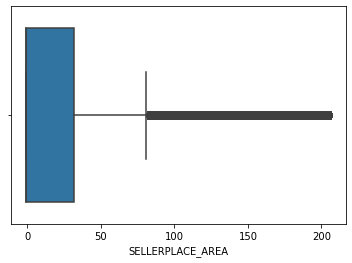

In [123]:
sns.boxplot(prev_apps_numeric_2.SELLERPLACE_AREA)

In [117]:
prev_apps_numeric.AMT_APPLICATION.quantile(q=0.99)

1350000.0

In [116]:
prev_apps_numeric.AMT_APPLICATION.max()

6905160.0

<AxesSubplot:xlabel='AMT_APPLICATION'>

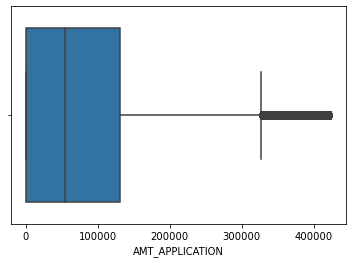

In [125]:
sns.boxplot(prev_apps_numeric_2.AMT_APPLICATION)

<AxesSubplot:xlabel='AMT_APPLICATION', ylabel='Count'>

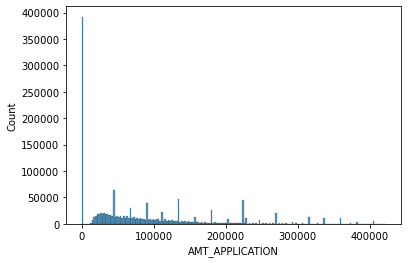

In [126]:
sns.histplot(prev_apps_numeric_2.AMT_APPLICATION)

In [132]:
prev_apps[prev_apps.AMT_CREDIT == 0]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305251
Refused          29128
Approved          1551
Unused offer       492
Name: NAME_CONTRACT_STATUS, dtype: int64

In [130]:
prev_apps_numeric_2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [129]:
prev_apps_numeric_2[prev_apps_numeric_2.AMT_APPLICATION == 0]

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,NaN,0.0,0.0,NaN,NaN,11.0,1,NaN,...,NaN,-14.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,NaN,0.0,0.0,NaN,NaN,7.0,1,NaN,...,NaN,-21.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,NaN,0.0,0.0,NaN,NaN,15.0,1,NaN,...,NaN,-386.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,NaN,0.0,0.0,NaN,NaN,15.0,1,NaN,...,NaN,-57.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1172842,302212,NaN,0.0,0.0,NaN,NaN,9.0,1,NaN,...,NaN,-239.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670186,1433968,272570,NaN,0.0,0.0,NaN,NaN,15.0,1,NaN,...,NaN,-21.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670187,1971628,435554,NaN,0.0,0.0,NaN,NaN,10.0,1,NaN,...,NaN,-134.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670190,2381880,175920,NaN,0.0,0.0,NaN,NaN,11.0,1,NaN,...,NaN,-243.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670192,2101747,339383,3375.0,0.0,67500.0,NaN,NaN,18.0,1,NaN,...,NaN,-540.0,10.0,0.0,NaN,-438.0,NaN,NaN,NaN,0.0


<AxesSubplot:xlabel='AMT_CREDIT'>

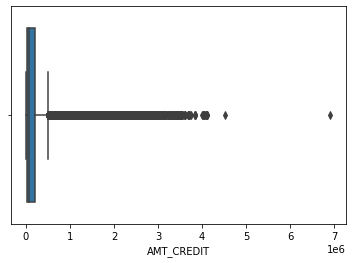

In [113]:
sns.boxplot(prev_apps_numeric.AMT_CREDIT)

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

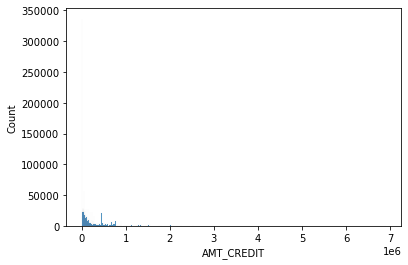

In [114]:
sns.histplot(prev_apps_numeric.AMT_CREDIT)

In [111]:
prev_apps_numeric.AMT_APPLICATION.sort_values(ascending=False)

779304     6905160.0
1163698    5850000.0
1058067    5850000.0
1348406    5085000.0
1245539    4455000.0
             ...    
908128           0.0
908129           0.0
908130           0.0
908132           0.0
951639           0.0
Name: AMT_APPLICATION, Length: 1669868, dtype: float64

In [104]:
prev_apps_numeric[prev_apps_numeric.SELLERPLACE_AREA == prev_apps_numeric.SELLERPLACE_AREA.max()]

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
151,2783413,269324,5775.615,128205.0,128205.0,0.0,128205.0,20,1,0.0,...,NaN,-991,4000000,24.0,365243.0,-960.0,-270.0,-360.0,-354.0,0.0
157014,2094519,392616,19317.465,428800.5,428800.5,0.0,428800.5,20,1,0.0,...,NaN,-754,4000000,24.0,365243.0,-723.0,-33.0,-33.0,-31.0,0.0
310061,2403159,450405,3748.590,83209.5,83209.5,0.0,83209.5,19,1,0.0,...,NaN,-485,4000000,24.0,365243.0,-452.0,238.0,365243.0,365243.0,0.0
919667,1125247,228186,2887.830,64102.5,64102.5,0.0,64102.5,18,1,0.0,...,NaN,-864,4000000,24.0,365243.0,-833.0,-143.0,-143.0,-141.0,0.0
1427909,1993482,390387,14535.180,121450.5,132138.0,0.0,121450.5,13,1,0.0,...,NaN,-379,4000000,10.0,365243.0,-348.0,-78.0,-78.0,-74.0,0.0


In [109]:
prev_apps_numeric.corr()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,-0.000309,0.011459,0.003303,0.003660,-0.001313,0.015293,-0.002661,-0.002828,-0.004051,...,-0.022312,0.019103,-0.001079,0.015589,-0.001478,-0.000071,0.001222,0.001915,0.001781,0.003986
SK_ID_CURR,-0.000309,1.000000,0.000577,0.000270,0.000185,-0.000063,0.000369,0.002846,0.000099,0.001158,...,-0.016757,-0.000627,0.001265,0.000031,-0.001329,-0.000757,0.000252,-0.000318,-0.000020,0.000876
AMT_ANNUITY,0.011459,0.000577,1.000000,0.808872,0.816429,0.267694,0.820895,-0.036201,0.020639,-0.103878,...,-0.202335,0.279051,-0.015027,0.394535,0.052839,-0.053295,-0.068877,0.082659,0.068022,0.283080
AMT_APPLICATION,0.003303,0.000270,0.808872,1.000000,0.975822,0.482776,0.999884,-0.014406,0.004317,-0.072479,...,-0.199733,0.133745,-0.007654,0.680630,0.074544,-0.049532,-0.084905,0.172627,0.148618,0.259219
AMT_CREDIT,0.003660,0.000185,0.816429,0.975822,1.000000,0.301284,0.993087,-0.021030,-0.025172,-0.188128,...,-0.205158,0.133850,-0.009573,0.674278,-0.036813,0.002881,0.044031,0.224829,0.214320,0.263932
AMT_DOWN_PAYMENT,-0.001313,-0.000063,0.267694,0.482776,0.301284,1.000000,0.482776,0.016776,0.001597,0.473935,...,-0.115343,-0.024536,0.003533,0.031659,-0.001773,-0.013586,-0.000869,-0.031425,-0.030702,-0.042585
AMT_GOODS_PRICE,0.015293,0.000369,0.820895,0.999884,0.993087,0.482776,1.000000,-0.045267,-0.017100,-0.072479,...,-0.199733,0.290422,-0.015842,0.672129,-0.024445,-0.021062,0.016883,0.211696,0.209296,0.243400
HOUR_APPR_PROCESS_START,-0.002661,0.002846,-0.036201,-0.014406,-0.021030,0.016776,-0.045267,1.000000,0.005789,0.025930,...,-0.045720,-0.039977,0.015673,-0.055511,0.014321,-0.002797,-0.016567,-0.018018,-0.018254,-0.117318
NFLAG_LAST_APPL_IN_DAY,-0.002828,0.000099,0.020639,0.004317,-0.025172,0.001597,-0.017100,0.005789,1.000000,0.004554,...,0.024640,0.016548,0.000913,0.063347,-0.000409,-0.002288,-0.001981,-0.002277,-0.000744,-0.007124
RATE_DOWN_PAYMENT,-0.004051,0.001158,-0.103878,-0.072479,-0.188128,0.473935,-0.072479,0.025930,0.004554,1.000000,...,-0.106143,-0.208742,-0.006489,-0.278875,-0.007969,-0.039178,-0.010934,-0.147562,-0.145461,-0.021633


In [108]:
?prev_apps_numeric.corr

Signature:
prev_apps_numeric.corr(
    method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson',
    min_periods: 'int' = 1,
) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.

Returns
-------
DataFrame
    Correlation matrix.

See Also
--------
DataFrame.corrwith : Comput

In [84]:
prev_apps_numeric.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [89]:
first = prev_apps_numeric.AMT_ANNUITY.describe()['25%']

In [90]:
third = prev_apps_numeric.AMT_ANNUITY.describe()['75%']

In [91]:
iqr = third - first

In [92]:
lower = first - (1.5 * iqr)

In [93]:
upper = third + (1.5 * iqr)

In [95]:
outliers = prev_apps_numeric[(prev_apps_numeric.AMT_ANNUITY < lower) | (prev_apps_numeric.AMT_ANNUITY > upper)]

In [96]:
outliers.shape

(82762, 21)

In [97]:
prev_apps_numeric.shape

(1669868, 21)

{'whiskers': [<matplotlib.lines.Line2D at 0x21b265799a0>,
 'caps': [<matplotlib.lines.Line2D at 0x21b26566040>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b26579670>],
 'medians': [<matplotlib.lines.Line2D at 0x21b26566760>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b26566af0>],
 'means': []}

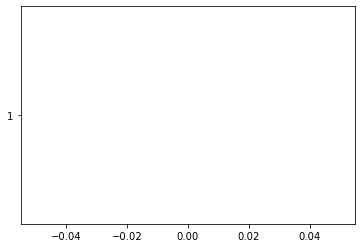

In [85]:
plt.boxplot(prev_apps_numeric.AMT_ANNUITY, vert=False)

<AxesSubplot:xlabel='AMT_ANNUITY'>

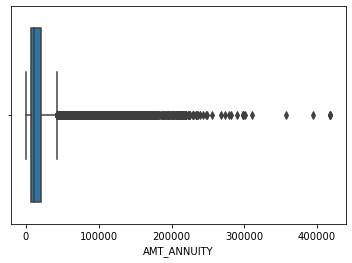

In [86]:
sns.boxplot(prev_apps_numeric.AMT_ANNUITY)

In [57]:
prev_apps.NFLAG_INSURED_ON_APPROVAL.value_counts()

Series([], Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64)

In [38]:
prev_apps.NFLAG_INSURED_ON_APPROVAL.isna().value_counts()

False    997149
True     673065
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [23]:
prev_apps.RATE_INTEREST_PRIMARY.head()

0    0.182832
1         NaN
2         NaN
3         NaN
4         NaN
Name: RATE_INTEREST_PRIMARY, dtype: float64

In [24]:
prev_apps.RATE_INTEREST_PRIMARY.dtype

dtype('float64')

In [26]:
prev_apps.RATE_INTEREST_PRIMARY.mean()

0.18835688954982696

In [27]:
prev_apps.RATE_INTEREST_PRIMARY.sum()

1120.9118497109823

In [25]:
prev_apps.RATE_INTEREST_PRIVILEGED.dtype

dtype('float64')

#### Since the null values are NaN, and they are not changing the type of the columns, and they are not affecting any statistical operations on the columns, it is safe to leave these columns
#### However, care should be taken to check for these values when performing any operation involving these columns

##### Large number of rows with lesser columns than in application_data.csv

### 2. Find missing values

### 3. Find Outliers and handle them

##### Only discontinuous parts are outliers? How to identify outliers?

### 4. Data imbalance

### Find correlation between numeric values

### ???. Join prev dataset with application dataset?
* Need to do this to analyze variables that led to applications being rejected
* Merge with applications and see correlation of numeric variables with target
* Check correlation and make plots for variables that are highly correlated - ???

##### Find Categorical and Numeric values

In [9]:
prev_apps_numeric = pd.DataFrame()
prev_apps_cat = pd.DataFrame()

for col in prev_apps.columns:
    if (np.issubdtype(prev_apps[col], np.number)):
        prev_apps_numeric[col] = prev_apps[col]
    else:
        prev_apps_cat[col] = prev_apps[col]

In [10]:
prev_apps_numeric.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.0,...,0.867336,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,NaN,...,NaN,-164,-1,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,NaN,...,NaN,-301,-1,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,NaN,...,NaN,-512,-1,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,...,NaN,-781,-1,24.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
prev_apps_cat.head()

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high


In [ ]:
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 7))


x_col = 'AMT_INCOME_TOTAL'
y_col = 'CODE_GENDER'
readable_name = 'Total Income by Gender'

hue_order = sorted(set(all_apps_no_diff[y_col].values))

# No difficulty
plt.subplot(1,2,1)
sns.boxplot(data=all_apps_no_diff, x=x_col, y=y_col, order=hue_order)
plt.title(f'No payment difficulty - {readable_name}', fontweight='bold', fontsize=16)

#Difficulty
plt.subplot(1,2,2)
sns.boxplot(data=all_apps_diff, x=x_col, y=y_col, order=hue_order)
plt.title(f'Payment difficulty - {readable_name}', fontweight='bold', fontsize=16)

plt.show()